#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


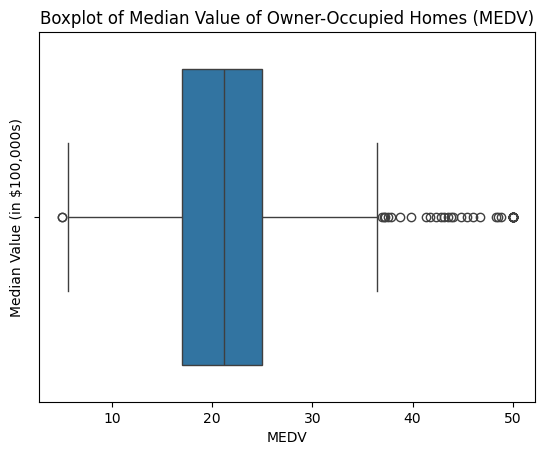

In [33]:
# 1. Boxplot for the Median Value of Owner-Occupied Homes
sns.boxplot(x=boston_df['MEDV'])  
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.ylabel("Median Value (in $100,000s)")
pyplot.show()

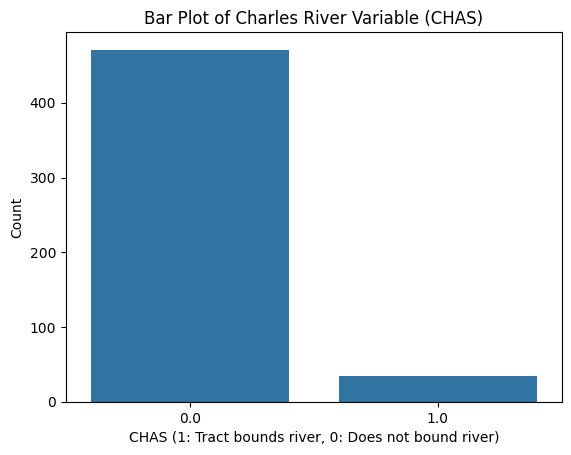

In [32]:
# 2. Bar Plot for the "CHAS" variable 
sns.countplot(x=boston_df['CHAS'])
pyplot.title("Bar Plot of Charles River Variable (CHAS)")
pyplot.xlabel("CHAS (1: Tract bounds river, 0: Does not bound river)")
pyplot.ylabel("Count")
pyplot.show()

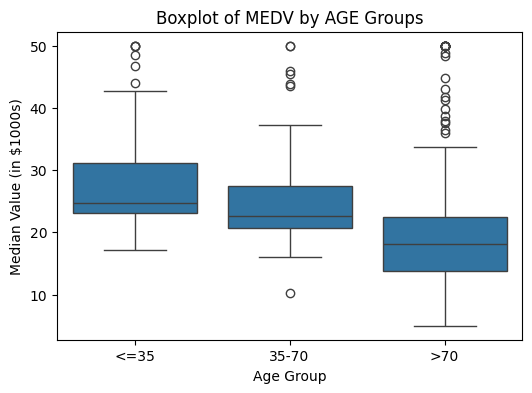

In [31]:
# 3. Boxplot for MEDV vs AGE Groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

pyplot.figure(figsize=(6, 4))
sns.boxplot(x=boston_df['AGE_Group'], y=boston_df['MEDV'])
pyplot.title("Boxplot of MEDV by AGE Groups")
pyplot.xlabel("Age Group")
pyplot.ylabel("Median Value (in $1000s)")
pyplot.show()

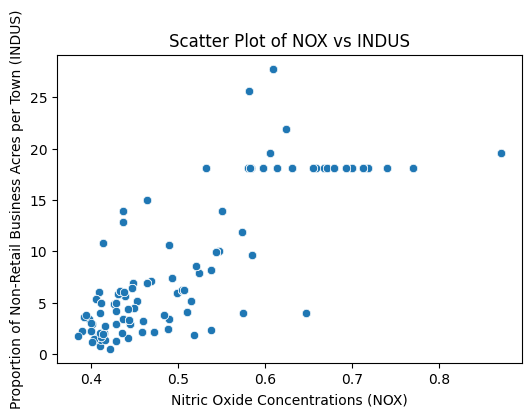

In [16]:
# 4. Scatter Plot for NOX vs INDUS
pyplot.figure(figsize=(6, 4))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title("Scatter Plot of NOX vs INDUS")
pyplot.xlabel("Nitric Oxide Concentrations (NOX)")
pyplot.ylabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
pyplot.show()



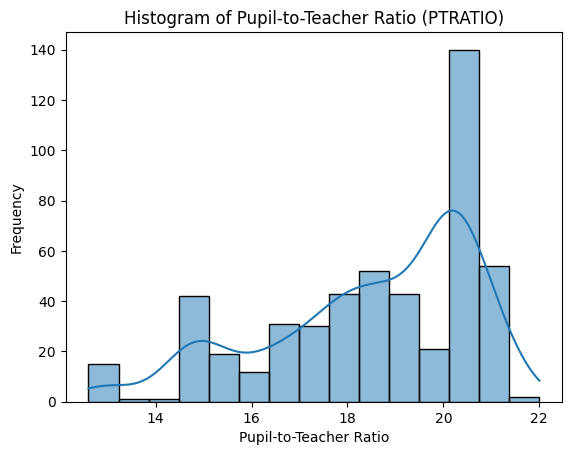

In [15]:
# 5. Histogram for Pupil-to-Teacher Ratio (PTRATIO)

sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title("Histogram of Pupil-to-Teacher Ratio (PTRATIO)")
pyplot.xlabel("Pupil-to-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

In [29]:
# 1. T-test: Difference in MEDV between houses bounded by the Charles River or not
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value = stats.ttest_ind(chas_0, chas_1, equal_var=False)  # Welch's T-test
print(f"T-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

T-test: t-statistic = -3.113, p-value = 0.004


Since the p-value is less than 0.05, we can reject the null hypothesis. That is, there is a significant difference in median value of houses bounded by the Charles river

In [23]:
# 2. ANOVA: Difference in MEDV across AGE groups
anova_result = smf.ols('MEDV ~ C(AGE_Group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result)
print("ANOVA Results:\n", anova_table)

ANOVA Results:
                  df        sum_sq      mean_sq         F        PR(>F)
C(AGE_Group)    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual      503.0  37314.563532    74.184023       NaN           NaN


Since the p-value is less than 0.05, we can reject the null hypothesis.

In [26]:
# 3. Pearson Correlation: Relationship between NOX and INDUS
correlation, corr_p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: r = {correlation:.3f}, p-value = {corr_p_value:.3f}")

Pearson Correlation: r = 0.764, p-value = 0.000


The correlation coefficient (r) of approximately 0.76 indicates a strong positive linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). Also, The p-value (7.913361061210442e-98) is much less than the common significance level of 0.05, which means we can reject the null hypothesis. Therefore, we can conclude that there is a significant positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [28]:
# 4. Regression Analysis: Impact of DIS on MEDV
X = sm.add_constant(boston_df['DIS'])  # Add intercept
y = boston_df['MEDV']
regression_model = sm.OLS(y, X).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        12:43:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Based on these results (p-value of 1.21e-08), we can conclude that there is a significant positive impact of an additional weighted distance (1.0916 for each unit of distance) to the five Boston employment centers on the median value of owner-occupied homes.